### Import packages

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
import math

%matplotlib inline

In [14]:
# pip install ydata-profiling
from ydata_profiling import ProfileReport

### Read data

In [19]:
import pandas as pd

# Citim datasetul :
data = pd.read_csv("Employee.csv")

# Afisam primele 5 randuri :
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


### Drop empty lines in data and remove NAN's

In [22]:
data = data.dropna()
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


### Reset the index for potentially removed rows in data

In [25]:
data = data.reset_index(drop=True)

## EDA - Exploratory Data Analysis

### View data statistics - short format

In [29]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


### View data statistics - long format

In [32]:
profile = ProfileReport(data, title="Employee")

In [33]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 112.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Important: We have 65.63%% samples with no leave and 34.37% leave samples in our dataset

### Change categorical string/boolean columns to categorical integer columns

In [38]:
# Codificare valori categorice ca numere întregi
data['Education'] = data['Education'].astype('category').cat.codes
data['City'] = data['City'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes
data['EverBenched'] = data['EverBenched'].astype('category').cat.codes


# Afișăm primele 5 rânduri pentru confirmare
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [40]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


### Create x and y from original data

In [43]:
x_data = data.drop(columns=['LeaveOrNot'])
x_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


In [45]:
y_data = data[['LeaveOrNot']]
y_data

,LeaveOrNot
0,0
1,1
2,0
3,1
4,1
...,...
4648,0
4649,1
4650,1
4651,0


### View features against Leave or Not

In [48]:
plt.scatter(x_data['Age'], y_data)

### Split data into training and validation datasets: Default 80% train, 20% validation

In [51]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

### Visualize how one sample looks like

In [54]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

In [56]:
x_train[0]

array([   0, 2012,    1,    3,   38,    0,    0,    1], dtype=int64)

### Visualize the nuber of training samples and number of validation samples

In [59]:
len(y_train), len(y_validation)

(3722, 931)

### Visualize the number of no leave vs leave samples in training dataset

#### Having 65.63% samples with no leave and 34.37% samples with leave in our dataset
#### So we have a ratio of about 1.91 no leave samples to 1 leave sample.
#### Our training and validation dataset should respect this ratio approximately

In [63]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([2442, 1280], dtype=int64))

#### 2442 samples of 0 (no leave) and 1280 samples of 1 (leave)
#### 1280 * 1.91 = 2442

### Visualize the number of no leave vs leave samples in validation dataset

#### 611 samples of 0 (no leave) and 320 samples of 1 (leave)
#### 320 * 1.91 = 611

In [68]:
np.unique(y_validation, return_counts=True)

(array([0, 1], dtype=int64), array([611, 320], dtype=int64))

### Standardization - mean and standard deviation calculation

In [71]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [73]:
x_train = (x_train - mean) / sigma

### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [76]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [79]:
x_train.min(), x_train.max()

(-3.0185182860067408, 3.329490604974129)

### View min and max values after standardization from training dataset

In [82]:
x_validation.min(), x_validation.max()

(-3.0185182860067408, 3.329490604974129)

### Logistic Regression implementation

In [85]:
def sigmoid(x):
    g = 1 / (1 + np.exp(-x))
    return g

#### Examples of using sigmoid values

In [88]:
sigmoid(1)

0.7310585786300049

In [90]:
sigmoid(0)

0.5

In [92]:
sigmoid(-1)

0.2689414213699951

In [94]:
sigmoid(-1000)

C:\Users\Moisan Catalin-Ionut\AppData\Local\Temp\ipykernel_13456\3992194360.py:2: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))


0.0

In [96]:
sigmoid(100)

1.0

In [98]:
def compute_cost(X, y, w, b, lambda_=1):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i) 
             
    cost = cost / m
    return cost

In [100]:
def compute_gradient(X, y, w, b, lambda_=1):
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]      #scalar
        dj_db += err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw

In [102]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):    
    # number of training examples
    m = len(x_train)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)
    
    for i in range(num_iters):
        
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        
        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_train_b.npy', b_in) 


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_valid_b.npy', b_in) 
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")
        
    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [104]:
import os
os.makedirs('model', exist_ok=True)

In [110]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 1000
alpha = 0.01
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

C:\Users\Moisan Catalin-Ionut\AppData\Local\Temp\ipykernel_13456\2253367060.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i * X[i,j]      #scalar


Iteration    0: Cost Train: 0.692513 	  Cost Validation: 0.692503
Iteration  100: Cost Train: 0.645713 	  Cost Validation: 0.644855
Iteration  200: Cost Train: 0.620169 	  Cost Validation: 0.618745
Iteration  300: Cost Train: 0.605499 	  Cost Validation: 0.603698
Iteration  400: Cost Train: 0.596661 	  Cost Validation: 0.594609
Iteration  500: Cost Train: 0.591124 	  Cost Validation: 0.588906
Iteration  600: Cost Train: 0.587544 	  Cost Validation: 0.585218
Iteration  700: Cost Train: 0.585173 	  Cost Validation: 0.582777
Iteration  800: Cost Train: 0.583572 	  Cost Validation: 0.581133
Iteration  900: Cost Train: 0.582475 	  Cost Validation: 0.580009
Iteration  999: Cost Train: 0.581720 	  Cost Validation: 0.579239


In [112]:
best_w_final = np.load('model/best_valid_w_in.npy')
best_b_final = np.load('model/best_valid_b.npy')

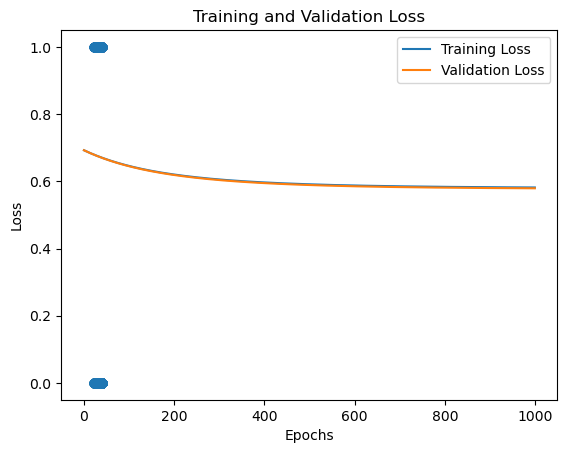

In [114]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)
 
# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [116]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
        
    return p

In [118]:
y_predicted = predict(x_train, w_final, b_final)

C:\Users\Moisan Catalin-Ionut\AppData\Local\Temp\ipykernel_13456\7029633.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [120]:
y_train.shape

(3722, 1)

In [122]:
y_train.reshape(-1).shape, y_predicted.shape

((3722,), (3722,))

In [124]:
(y_train.reshape(-1) == y_predicted).sum()

2619

In [126]:
x_train.shape
x_train.shape

(3722, 8)

In [128]:
y_train = y_train.reshape(-1)

In [130]:
type(y_predicted)

numpy.ndarray

In [132]:
def metrics_computations(x:np.array,
                         y_true:np.array,
                         y_predicted: np.array):
    total_number_of_samples = x.shape[0]
    accuracy = (y_true == y_predicted).sum() / total_number_of_samples
    true_positive = ((y_predicted == 1) & (y_true == 1)).sum()
    false_positive = ((y_predicted == 1) & (y_true == 0)).sum()
    false_negative = ((y_predicted == 0) & (y_true == 1)).sum()
    true_negative = ((y_predicted == 0) & (y_true == 0)).sum()
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    f1_score = (2 * precision * recall) / (precision + recall)
    
    false_negative_rate = false_negative / (false_negative + true_positive)
    false_positive_rate = false_positive / (false_positive + true_negative)

    return (accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate)

In [134]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

In [136]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 70.37% 
 Precision: 61.10% 
 Recall: 38.05% 
 F1 Score: 46.89% 
 Specificity: 87.31% 
 False Positive Rate: 12.69% 
 False Negative Rate: 61.95%


In [139]:
y_predicted_validation = predict(x_validation, w_final, b_final)

C:\Users\Moisan Catalin-Ionut\AppData\Local\Temp\ipykernel_13456\7029633.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [141]:
y_validation = y_validation.reshape(-1)

In [143]:
for i, j in zip(y_validation, y_predicted_validation):
    print(i, j)

1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 1.0
0 0.0
1 0.0
1 0.0
1 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 0.0
0 1.0
0 0.0
1 0.0
1 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 1.0
1 0.0
1 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
1 1.0
0 1.0
1 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
1 0.0
1 1.0
1 1.0
1 0.0
0 0.0
0 0.0
0 0.0
1 0.0
1 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
1 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 1.0
1 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
1 0.0
1 1.0
1 0.0
1 0.0
1 0.0
0 0.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 0.0
1 1.0
1 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 1.0
0 0.0
1 0.0
1 1.

In [145]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

In [147]:
print(f"[Valid] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[Valid] Accuracy: 71.21% 
 Precision: 62.62% 
 Recall: 40.31% 
 F1 Score: 49.05% 
 Specificity: 87.40% 
 False Positive Rate: 12.60% 
 False Negative Rate: 59.69%


### Analyze the feature importance

In [150]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<Axes: ylabel='Feature'>

### Add polynomial features for improving model capacity

In [154]:
#pip install scikit-learn
from sklearn import preprocessing

In [156]:
poly = preprocessing.PolynomialFeatures(2, interaction_only=False, include_bias=False)

In [158]:
poly_values = poly.fit_transform(x_data)
poly_values

array([[0.000e+00, 2.017e+03, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.013e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        9.000e+00],
       [0.000e+00, 2.014e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       ...,
       [1.000e+00, 2.018e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        2.500e+01],
       [0.000e+00, 2.012e+03, 0.000e+00, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [0.000e+00, 2.015e+03, 0.000e+00, ..., 1.000e+00, 4.000e+00,
        1.600e+01]])

In [160]:
poly_column_names = list(poly.get_feature_names_out(x_data.columns))
poly_column_names

['Education',
 'JoiningYear',
 'City',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain',
 'Education^2',
 'Education JoiningYear',
 'Education City',
 'Education PaymentTier',
 'Education Age',
 'Education Gender',
 'Education EverBenched',
 'Education ExperienceInCurrentDomain',
 'JoiningYear^2',
 'JoiningYear City',
 'JoiningYear PaymentTier',
 'JoiningYear Age',
 'JoiningYear Gender',
 'JoiningYear EverBenched',
 'JoiningYear ExperienceInCurrentDomain',
 'City^2',
 'City PaymentTier',
 'City Age',
 'City Gender',
 'City EverBenched',
 'City ExperienceInCurrentDomain',
 'PaymentTier^2',
 'PaymentTier Age',
 'PaymentTier Gender',
 'PaymentTier EverBenched',
 'PaymentTier ExperienceInCurrentDomain',
 'Age^2',
 'Age Gender',
 'Age EverBenched',
 'Age ExperienceInCurrentDomain',
 'Gender^2',
 'Gender EverBenched',
 'Gender ExperienceInCurrentDomain',
 'EverBenched^2',
 'EverBenched ExperienceInCurrentDomain',
 'ExperienceInCurrentDomain^2']

In [162]:
x_data = pd.DataFrame(poly_values, columns=poly_column_names)
x_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Education^2,Education JoiningYear,...,Age^2,Age Gender,Age EverBenched,Age ExperienceInCurrentDomain,Gender^2,Gender EverBenched,Gender ExperienceInCurrentDomain,EverBenched^2,EverBenched ExperienceInCurrentDomain,ExperienceInCurrentDomain^2
0,0.0,2017.0,0.0,3.0,34.0,1.0,0.0,0.0,0.0,0.0,...,1156.0,34.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2013.0,2.0,1.0,28.0,0.0,0.0,3.0,0.0,0.0,...,784.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,9.0
2,0.0,2014.0,1.0,3.0,38.0,0.0,0.0,2.0,0.0,0.0,...,1444.0,0.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,4.0
3,1.0,2016.0,0.0,3.0,27.0,1.0,0.0,5.0,1.0,2016.0,...,729.0,27.0,0.0,135.0,1.0,0.0,5.0,0.0,0.0,25.0
4,1.0,2017.0,2.0,3.0,24.0,1.0,1.0,2.0,1.0,2017.0,...,576.0,24.0,24.0,48.0,1.0,1.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,0.0,2013.0,0.0,3.0,26.0,0.0,0.0,4.0,0.0,0.0,...,676.0,0.0,0.0,104.0,0.0,0.0,0.0,0.0,0.0,16.0
4649,1.0,2013.0,2.0,2.0,37.0,1.0,0.0,2.0,1.0,2013.0,...,1369.0,37.0,0.0,74.0,1.0,0.0,2.0,0.0,0.0,4.0
4650,1.0,2018.0,1.0,3.0,27.0,1.0,0.0,5.0,1.0,2018.0,...,729.0,27.0,0.0,135.0,1.0,0.0,5.0,0.0,0.0,25.0
4651,0.0,2012.0,0.0,3.0,30.0,1.0,1.0,2.0,0.0,0.0,...,900.0,30.0,30.0,60.0,1.0,1.0,2.0,1.0,2.0,4.0


In [164]:
x_data.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'Education^2',
       'Education JoiningYear', 'Education City', 'Education PaymentTier',
       'Education Age', 'Education Gender', 'Education EverBenched',
       'Education ExperienceInCurrentDomain', 'JoiningYear^2',
       'JoiningYear City', 'JoiningYear PaymentTier', 'JoiningYear Age',
       'JoiningYear Gender', 'JoiningYear EverBenched',
       'JoiningYear ExperienceInCurrentDomain', 'City^2', 'City PaymentTier',
       'City Age', 'City Gender', 'City EverBenched',
       'City ExperienceInCurrentDomain', 'PaymentTier^2', 'PaymentTier Age',
       'PaymentTier Gender', 'PaymentTier EverBenched',
       'PaymentTier ExperienceInCurrentDomain', 'Age^2', 'Age Gender',
       'Age EverBenched', 'Age ExperienceInCurrentDomain', 'Gender^2',
       'Gender EverBenched', 'Gender ExperienceInCurrentDomain',
       'EverBenched^2', 'EverBenched ExperienceInCu

### Split data into training and validation datasets: Default 80% train, 20% validation

In [168]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [170]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

### Visualize how one sample looks like

In [173]:
x_train[0]

array([0.000000e+00, 2.012000e+03, 1.000000e+00, 3.000000e+00,
       3.800000e+01, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       4.048144e+06, 2.012000e+03, 6.036000e+03, 7.645600e+04,
       0.000000e+00, 0.000000e+00, 2.012000e+03, 1.000000e+00,
       3.000000e+00, 3.800000e+01, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 9.000000e+00, 1.140000e+02, 0.000000e+00,
       0.000000e+00, 3.000000e+00, 1.444000e+03, 0.000000e+00,
       0.000000e+00, 3.800000e+01, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00])

### Visualize the nuber of training samples and number of validation samples

In [176]:
len(y_train), len(y_validation)

(3722, 931)

### Visualize the number of no leave vs leave samples in training dataset

#### Having 65.63% samples with no leave and 34.37% samples with leave in our dataset
#### So we have a ratio of about 1.91 no leave samples to 1 leave sample.
#### Our training and validation dataset should respect this ratio approximately

In [180]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([2442, 1280], dtype=int64))

#### 2442 samples of 0 (no leave) and 1280 samples of 1 (leave)
#### 1280 * 1.91 = 2442

### Visualize the number of no churn vs churn samples in validation dataset

#### 611 samples of 0 (no leave) and 320 samples of 1 (leave)
#### 320 * 1.91 = 611

In [185]:
np.unique(y_validation, return_counts=True)

(array([0, 1], dtype=int64), array([611, 320], dtype=int64))

### Standardization - mean and standard deviation calculation

In [188]:
mean   = np.mean(x_train, axis=0)
sigma  = np.std(x_train, axis=0)

In [190]:
x_train = (x_train - mean) / sigma

### Very important! Validation dataset MUST BE standardized using mean and standard deviation calculated from the training dataset

In [193]:
x_validation = (x_validation - mean) / sigma

### View min and max values after standardization from training dataset

In [196]:
x_train.min(), x_train.max()

(-3.022353031258381, 14.274178694931496)

### View min and max values after standardization from training dataset

In [199]:
x_validation.min(), x_validation.max()

(-3.022353031258381, 14.274178694931496)

### Train with polynomial features

In [202]:
def gradient_descent(x_train, y_train, x_validation, y_validation, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_=1):    
    # number of training examples
    m = len(x_train)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_train_history = []
    J_valid_history = []
    w_history = []

    best_train_score = cost_function(x_train, y_train, w_in, b_in, lambda_)
    best_validation_score = cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
    best_w_in_train = copy.deepcopy(w_in)
    best_b_train = copy.deepcopy(b_in)
    best_w_in_valid = copy.deepcopy(w_in)
    best_b_valid = copy.deepcopy(b_in)
    
    for i in range(num_iters):
        
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x_train, y_train, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        
        cost_train =  cost_function(x_train, y_train, w_in, b_in, lambda_)
        J_train_history.append(cost_train)

        cost_valid =  compute_cost(x_validation, y_validation, w_in, b_in, lambda_)
        J_valid_history.append(cost_valid)

        if best_train_score > cost_train:
            best_train_score = cost_train
            np.save(f'model/best_poly_train_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_train_b.npy', b_in) 


        if best_validation_score > cost_valid:
            best_validation_score = cost_valid
            np.save(f'model/best_poly_valid_w_in.npy', w_in)    # .npy extension is added if not given
            np.save(f'model/best_poly_valid_b.npy', b_in) 
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost Train: {float(J_train_history[-1].squeeze()):f} \t  Cost Validation: {float(J_valid_history[-1].squeeze()):f}")
        
    return w_in, b_in, J_train_history, J_valid_history, w_history #return w and J,w history for graphing

In [206]:
initial_w = np.zeros(len(x_train[0]))
initial_b = 0

# Some gradient descent settings
iterations = 1000
alpha = 0.1
lambda_ = 0

w_final, b_final, J_train_history, J_valid_history, _ = gradient_descent(x_train=x_train, y_train=y_train, x_validation=x_validation, y_validation=y_validation, w_in=initial_w, b_in=initial_b, cost_function=compute_cost, gradient_function=compute_gradient, alpha=alpha, num_iters=iterations, lambda_=lambda_)

C:\Users\Moisan Catalin-Ionut\AppData\Local\Temp\ipykernel_13456\2253367060.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err_i * X[i,j]      #scalar


Iteration    0: Cost Train: 0.674320 	  Cost Validation: 0.673482
Iteration  100: Cost Train: 0.550077 	  Cost Validation: 0.537510
Iteration  200: Cost Train: 0.537350 	  Cost Validation: 0.518474
Iteration  300: Cost Train: 0.531394 	  Cost Validation: 0.509034
Iteration  400: Cost Train: 0.527755 	  Cost Validation: 0.503364
Iteration  500: Cost Train: 0.525202 	  Cost Validation: 0.499584
Iteration  600: Cost Train: 0.523259 	  Cost Validation: 0.496884
Iteration  700: Cost Train: 0.521705 	  Cost Validation: 0.494864
Iteration  800: Cost Train: 0.520427 	  Cost Validation: 0.493302
Iteration  900: Cost Train: 0.519356 	  Cost Validation: 0.492068
Iteration  999: Cost Train: 0.518457 	  Cost Validation: 0.491084


In [208]:
best_poly_w_final = np.load('model/best_poly_valid_w_in.npy')
best_poly_b_final = np.load('model/best_poly_valid_b.npy')

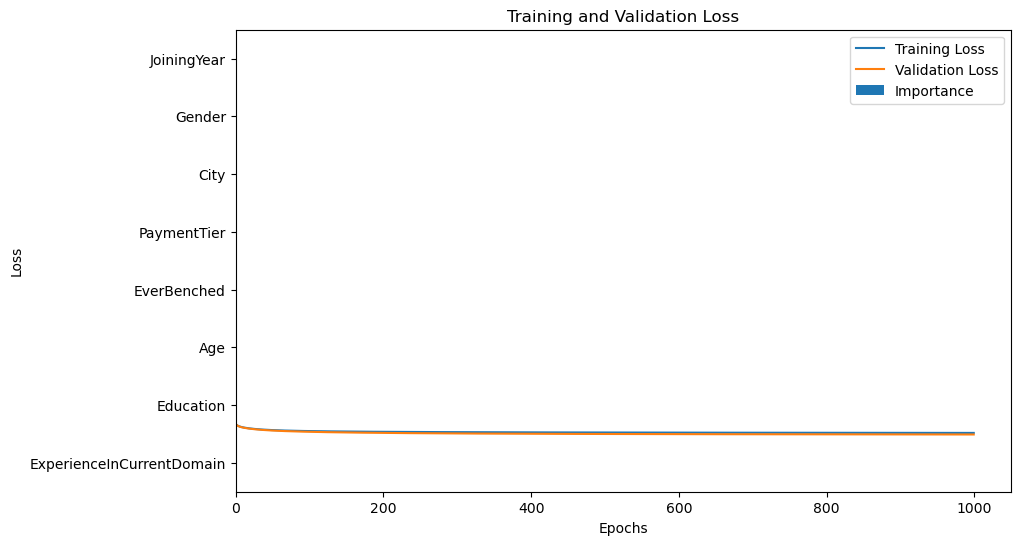

In [210]:
# Generate a sequence of integers to represent the epoch numbers
#epochs = range(1, iterations+1)
 
# Plot and label the training and validation loss values
plt.plot(J_train_history, label='Training Loss')
plt.plot(J_valid_history, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
#plt.xticks(np.arange(0, iterations+1, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [212]:
def predict(X, w, b):
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += X[i][j] * w[j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
        
    return p

In [214]:
y_predicted = predict(x_train, w_final, b_final)

C:\Users\Moisan Catalin-Ionut\AppData\Local\Temp\ipykernel_13456\7029633.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [216]:
y_train.shape

(3722, 1)

In [218]:
y_train.reshape(-1).shape, y_predicted.shape

((3722,), (3722,))

In [220]:
(y_train.reshape(-1) == y_predicted).sum()

2757

In [222]:
y_train = y_train.reshape(-1)

In [224]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_train,
                                                                                                                     y_true=y_train,
                                                                                                                     y_predicted=y_predicted)

In [226]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 74.07% 
 Precision: 71.72% 
 Recall: 40.62% 
 F1 Score: 51.87% 
 Specificity: 91.61% 
 False Positive Rate: 8.39% 
 False Negative Rate: 59.38%


In [228]:
y_predicted_validation = predict(x_validation, w_final, b_final)

C:\Users\Moisan Catalin-Ionut\AppData\Local\Temp\ipykernel_13456\7029633.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = f_wb >= 0.5


In [230]:
y_validation = y_validation.reshape(-1)

In [232]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(x=x_validation,
                                                                                                                     y_true=y_validation,
                                                                                                                     y_predicted=y_predicted_validation)

In [234]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 77.55% 
 Precision: 75.81% 
 Recall: 50.94% 
 F1 Score: 60.93% 
 Specificity: 91.49% 
 False Positive Rate: 8.51% 
 False Negative Rate: 49.06%


### Analyze the feature importance

In [237]:
coefficients = copy.deepcopy(w_final)

feature_importance = pd.DataFrame({'Feature': x_data.columns.values, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.tail(20).plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<Axes: ylabel='Feature'>

#### For example most important feature is obtained by multipling two features: Total day minutes and Customer service calls

### Decision Tree 
#### Specialized in learning non-linear data
#### No need for Normalization/Standardization
#### No need for Polynomial Feature Transformation

In [243]:
x_data = data.drop(columns=['LeaveOrNot'])

### Split data into training and validation datasets: Default 80% train, 20% validation

In [246]:
x_train, x_validation, y_train, y_validation = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

In [248]:
x_train = x_train.to_numpy()
x_validation = x_validation.to_numpy()
y_train = y_train.to_numpy()
y_validation = y_validation.to_numpy()

### Visualize how one sample looks like

In [251]:
x_train[0]

array([   0, 2012,    1,    3,   38,    0,    0,    1], dtype=int64)

### Visualize the nuber of training samples and number of validation samples

In [254]:
len(y_train), len(y_validation)

(3722, 931)

### Visualize the number of no leave vs leave samples in training dataset

#### Having 65.63% samples with no leave and 34.37% samples with leave in our dataset
#### So we have a ratio of about 1.91 no leave samples to 1 leave sample.
#### Our training and validation dataset should respect this ratio approximately

In [258]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([2442, 1280], dtype=int64))

#### 2442 samples of 0 (no leave) and 1280 samples of 1 (leave)
#### 1280 * 1.91 = 2442

### Visualize the number of no leave vs leave samples in validation dataset

#### 611 samples of 0 (no leave) and 320 samples of 1 (leave)
#### 320 * 1.91 = 611

In [263]:
np.unique(y_validation, return_counts=True)

(array([0, 1], dtype=int64), array([611, 320], dtype=int64))

In [265]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

### Decision Tree Code and Implementation

#### Declare Decision Tree with corresponding Hyperparameters

In [269]:
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=5)

In [271]:
type(x_train)

numpy.ndarray

#### Train the Decision Tree

In [276]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Predict on the training dataset 

In [279]:
y_predicted = classifier.predict(x_train)
y_predicted = np.array(y_predicted)

### Display training metrics

In [282]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(
    x=x_train,
    y_true=y_train,
    y_predicted=y_predicted
)


In [284]:
print(f"[TRAIN] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[TRAIN] Accuracy: 213979.26% 
 Precision: 34.39% 
 Recall: 26.01% 
 F1 Score: 29.62% 
 Specificity: 73.99% 
 False Positive Rate: 26.01% 
 False Negative Rate: 73.99%


### Display validation metrics

In [287]:
y_predicted_valid = classifier.predict(x_validation)
y_predicted_valid = np.array(y_predicted_valid)

In [289]:
(accuracy, precision, recall, specificity, f1_score, false_negative_rate, false_positive_rate) = metrics_computations(
    x=x_validation,
    y_true=y_validation.reshape(-1),  # eliminăm .to_numpy()
    y_predicted=y_predicted_valid
)


In [291]:
print(f"[VALID] Accuracy: {(accuracy * 100.):.2f}% \n Precision: {(precision * 100):.2f}% \n Recall: {(recall * 100):.2f}% \n F1 Score: {(f1_score * 100.):.2f}% \n Specificity: {(specificity * 100):.2f}% \n False Positive Rate: {(false_positive_rate * 100):.2f}% \n False Negative Rate: {(false_negative_rate * 100):.2f}%")

[VALID] Accuracy: 83.03% 
 Precision: 83.47% 
 Recall: 63.12% 
 F1 Score: 71.89% 
 Specificity: 93.45% 
 False Positive Rate: 6.55% 
 False Negative Rate: 36.88%


### Display Decision Tree and Learned rules by the Tree 

In [294]:
list(x_data.columns)

['Education',
 'JoiningYear',
 'City',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain']

In [296]:
from sklearn.tree import plot_tree


In [298]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(70,50), dpi=300)
plot_tree(classifier, filled=True, fontsize=20, feature_names=list(x_data.columns),rounded=True, ax=axes)
plt.savefig('decisionTree.png')

In [299]:
text_representation = export_text(classifier, feature_names=list(x_data.columns))
print(text_representation)


|--- JoiningYear <= 2017.50
|   |--- PaymentTier <= 2.50
|   |   |--- JoiningYear <= 2016.50
|   |   |   |--- PaymentTier <= 1.50
|   |   |   |   |--- City <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- City >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- PaymentTier >  1.50
|   |   |   |   |--- Education <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Education >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- JoiningYear >  2016.50
|   |   |   |--- Age <= 26.50
|   |   |   |   |--- EverBenched <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EverBenched >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  26.50
|   |   |   |   |--- City <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- City >  1.50
|   |   |   |   |   |--- class: 0
|   |--- PaymentTier >  2.50
|   |   |--- Education <= 0.50
|   |   |   |--- Gender <= 0.50
|   |   |   |   |--- City <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |

In [300]:
from sklearn.tree import _tree

In [301]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [303]:
rules = get_rules(classifier, feature_names=list(x_data.columns), class_names=['No Leave', 'Leave'])
for r in rules:
    print(r)

if (JoiningYear <= 2017.5) and (PaymentTier > 2.5) and (Education <= 0.5) and (Gender > 0.5) and (City <= 0.5) then class: No Leave (proba: 84.82%) | based on 1,021 samples
if (JoiningYear <= 2017.5) and (PaymentTier > 2.5) and (Education <= 0.5) and (Gender <= 0.5) and (City <= 1.5) then class: No Leave (proba: 84.17%) | based on 581 samples
if (JoiningYear <= 2017.5) and (PaymentTier > 2.5) and (Education <= 0.5) and (Gender > 0.5) and (City > 0.5) then class: No Leave (proba: 96.12%) | based on 412 samples
if (JoiningYear > 2017.5) and (PaymentTier > 1.5) then class: Leave (proba: 100.0%) | based on 306 samples
if (JoiningYear <= 2017.5) and (PaymentTier <= 2.5) and (JoiningYear <= 2016.5) and (PaymentTier > 1.5) and (Education <= 0.5) then class: Leave (proba: 94.9%) | based on 255 samples
if (JoiningYear <= 2017.5) and (PaymentTier <= 2.5) and (JoiningYear > 2016.5) and (Age > 26.5) and (City <= 1.5) then class: No Leave (proba: 80.85%) | based on 188 samples
if (JoiningYear <= 20